In [60]:
import sklearn
import pandas as pd
import numpy as np 
from pandas import *
import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
#uzueplnijmy te braki z 2 kolumn
#https://scikit-learn.org/stable/modules/impute.html

In [59]:
df = pd.read_csv("poprawione_dane_v2.csv", low_memory = False)

In [29]:
for kolumna in df.columns:
    liczba_nan = df[kolumna].isna().sum()
    if liczba_nan != (int(0)):
        print(f"{kolumna}: {liczba_nan}")

rooms_num: 268
floor: 199431


In [30]:
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)

In [61]:
from sklearn.impute import SimpleImputer

array([[<Axes: title={'center': 'rooms_num'}>]], dtype=object)

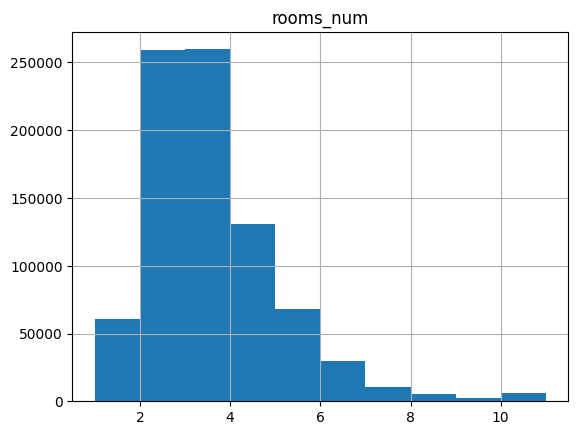

In [32]:
df[['rooms_num']].hist()

In [36]:
df[['rooms_num']].median()

rooms_num    3.0
dtype: float64

In [62]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(df[['rooms_num']]) #musza byc dwa nawiasy bo operacje musze byc na datafame a nie na series 1 wymiarowym
SimpleImputer()
df['rooms_num']=imp_median.transform(df[['rooms_num']])

array([[<Axes: title={'center': 'rooms_num'}>]], dtype=object)

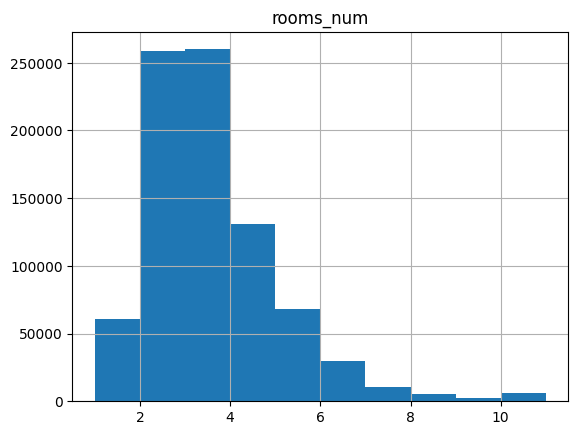

In [37]:
df[['rooms_num']].hist()

In [41]:
from sklearn.impute import KNNImputer

<Axes: >

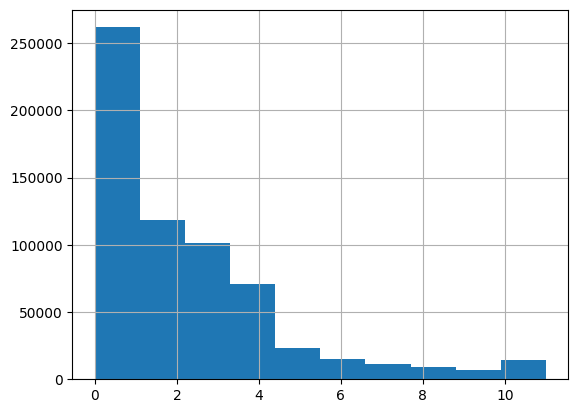

In [42]:
df['floor'].hist()

In [43]:
knn_imputer = KNNImputer(n_neighbors=2)
knn_imputer.fit_transform(df[['floor']])

array([[1.],
       [0.],
       [3.],
       ...,
       [8.],
       [0.],
       [0.]])

In [46]:
imputed_values = knn_imputer.fit_transform(df[['floor']])

df['floor'] = imputed_values.ravel() #ravel() upewnia sie ze mamy do czynienia z wektorem jednowymairowym

Tutaj dosłownie wyszedł peak na samym środku rozkładu i nic więcej, a uzupełnianie trwało 1,5h niestety nie zapisałem obrazka.

In [63]:
df.drop(['floor'], axis=1, inplace=True)

In [15]:
df.head()

,is_flat,is_business,description,title,price,lon_city,lat_city,price[currency],m,rooms_num,...,type_nan,market_primary,market_secondary,market_nan,lat_bin,lon_bin,property_type_apartment,property_type_house,property_type_unknown,property_type_nan
0,1,1,1693,50,389556,20.47703,53.77602,1,72.14,4.0,...,1,0,1,0,3,2,False,False,True,False
1,1,1,1743,43,500000,16.81106,52.36473,1,95.00,4.0,...,1,0,1,0,2,1,False,False,True,False
2,1,1,1345,42,238000,23.16996,53.12988,1,58.90,3.0,...,1,0,1,0,2,3,True,False,False,False
3,1,1,1612,37,209000,16.93352,52.40827,1,45.00,2.0,...,1,0,1,0,2,1,False,False,True,False
4,0,0,1665,45,729000,20.65332,52.47617,1,195.00,6.0,...,1,0,1,0,2,2,False,True,False,False


In [19]:
from sklearn.model_selection import train_test_split

predictors = list(df.columns[df.columns != 'price'])

X = df[predictors]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024, stratify=None)


In [20]:
# 

# scaler = RobustScaler()

# df = scaler.fit_transform(df)

In [21]:
import xgboost
print(xgboost.__version__)

2.0.3


In [25]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
#fit_transform zostanie wykonany automatycznie
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8))
])

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eta=0.1,
                              eval_metric=None, feature_types=None, gamma=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [27]:
predictions = pipeline.predict(X_test)

In [28]:

from sklearn.metrics import mean_absolute_error
#albo
#mae = np.mean(np.abs(predictions - targets))
# rmse = np.sqrt(mse)
from sklearn.metrics import r2_score

In [29]:
#ewaluacja modelu
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [30]:
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

RMSE: 2481883.4560644575
MAE: 104016.7217940756
R^2: 0.006509560224850941


Drugie podejscie ze strojeniem hiperparametrów i walidacją krzyżowa

In [ ]:
#ograniczenie zbioru tylko do warszawy zeby tak dlugo nie liczyło

In [46]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
('model', XGBRegressor())
])

params_grid = {
    'model__n_estimators': [100, 500, 1000],  # Liczba drzew
    'model__max_depth': [3, 6, 10],  # Maksymalna głębokość drzewa
    'model__eta': [0.01, 0.1, 0.3],  # Współczynnik uczenia, znany również jako learning rate
}




In [45]:
#help(GridSearchCV)
#n_jobs -1 oznacza uzycie wszystkich proce
# help(XGBRegressor)

In [47]:
import time
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=params_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
#cv=5 dzieli na 5 zestawów (foldów), Średnia z wyników uzyskanych na każdym z 5 zestawów testowych zostanie użyta do oceny danego zestawu hiperparametrów.
#verbose 1 - ograniczona liczba komunikatow, 0 - brak, wiecej niz 1 to wiecej komuniaktor
#n_jobs okresla ile rdzeni procesora przeznaczamy na to -1 - maksymalizuje
#'neg_mean_absolute_error' - ujemny (negative) bo maksymalizyujemy w grid_searchu bo on zawsze maksymalizuje a interesuje nas mae jak najmniejsze

In [48]:
%time grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 5min 27s
Wall time: 40min 11s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eta=0.1, eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=7,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=1000,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__eta': [0.01, 0.1, 0.3],
                         'model__max_depth': [3, 6, 10],
                         'model__n_estimators': [100, 500, 1000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [49]:
print("Najlepsze parametry:", grid_search.best_params_)

Najlepsze parametry: {'model__eta': 0.1, 'model__max_depth': 10, 'model__n_estimators': 1000}


In [50]:
predictions = grid_search.predict(X_test)

In [51]:
# Ewaluacja modelu
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [52]:
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

RMSE: 2463852.2729451573
MAE: 88087.10156559625
R^2: 0.02089277794889388


In [ ]:
MAE spadło o prawie 20 tysięcy.

In [53]:
from sklearn.ensemble import GradientBoostingClassifier #mozna tez tym

In [ ]:
#Warsawa
# lon_city  lat_city
# 21.00817  52.23614